In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk import word_tokenize

In [55]:
# Load your preprocessed dataset
df = pd.read_csv("preprocessed_twitter_sentiment_data.csv")

In [56]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [57]:
df.columns

Index(['sentiment', 'message', 'tweetid', 'is_retweet', 'username',
       'cleaned_message', 'links', 'expanded_message', 'tokenized_message',
       'stemmed_message', 'lemmatized_message', 'pos_tags'],
      dtype='object')

In [58]:
# Set seaborn style to dark
# sns.set(style="dark")

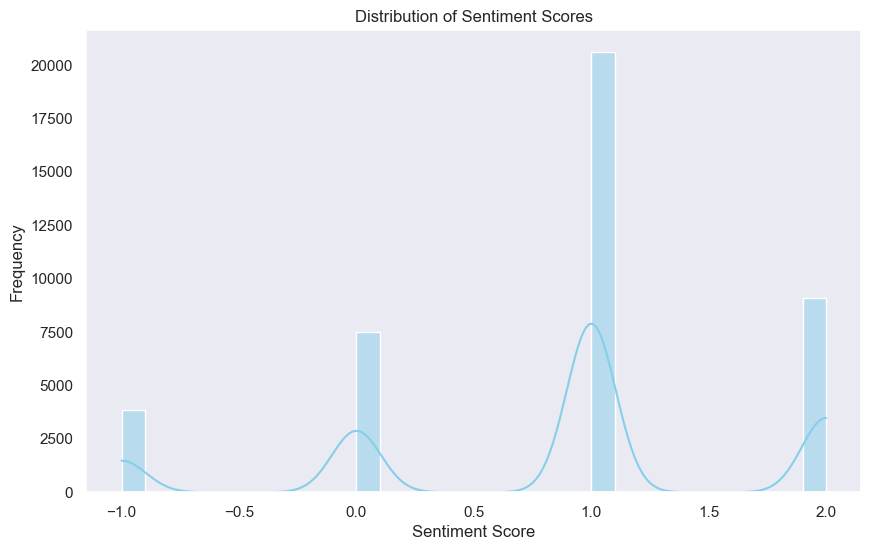

In [59]:
# Visualization 1: Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

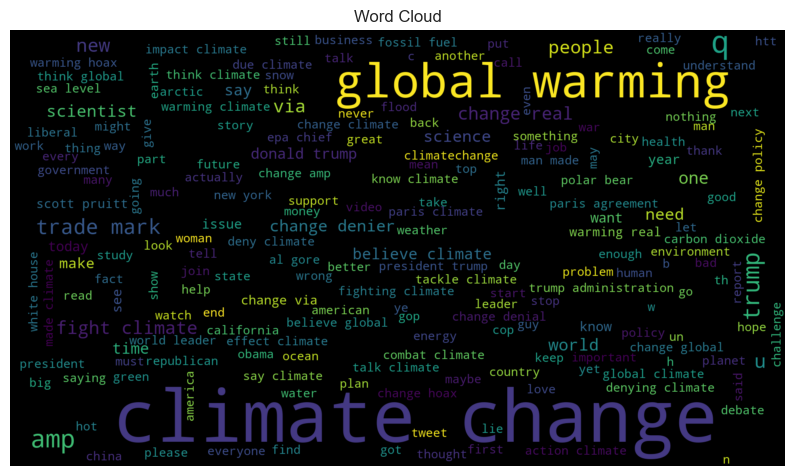

In [61]:
# Visualization 2: Word Cloud
df['lemmatized_message'] = df['lemmatized_message'].astype(str)
wordcloud = WordCloud(width=1920, height=1080, background_color='black').generate(' '.join(df['lemmatized_message'].explode()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

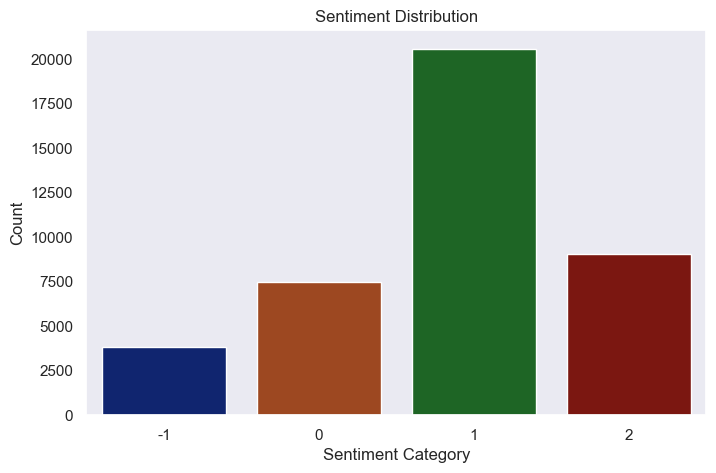

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='dark')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# # Step 4: Scatter Plot for Sentiment vs. Number of Links
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='sentiment', y='links', data=df, hue='is_retweet', palette='Set2', alpha=0.7)
# plt.title('Sentiment vs. Number of Links')
# plt.xlabel('Sentiment Score')
# plt.ylabel('Number of Links')
# plt.legend(title='Is Retweet', loc='upper right', labels=['Not Retweet', 'Retweet'])
# plt.show()

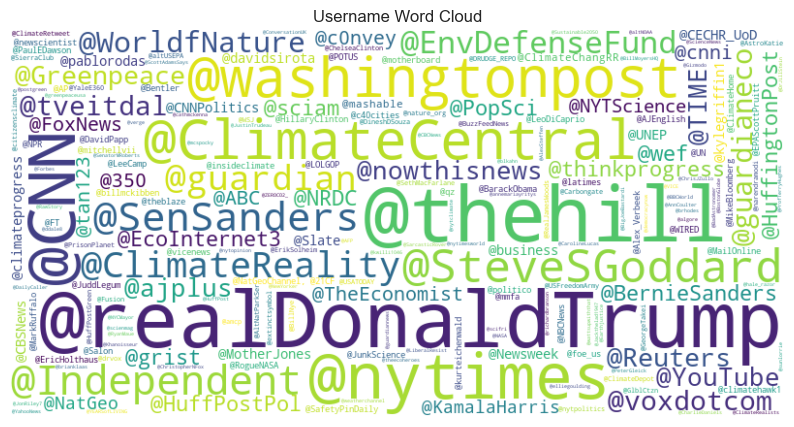

In [63]:
# Step 5: Word Cloud for Usernames
username_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['username'].value_counts())
plt.figure(figsize=(10, 6))
plt.imshow(username_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Username Word Cloud')
plt.show()

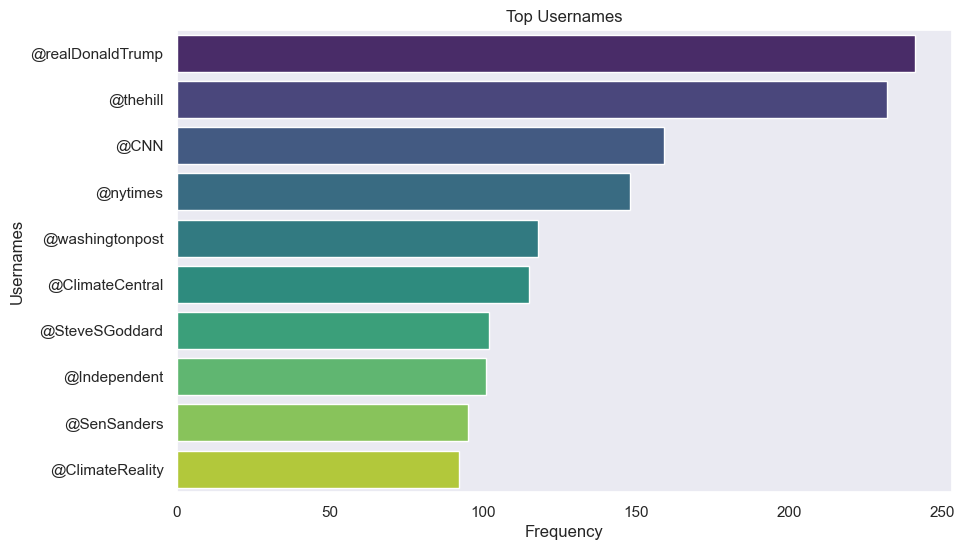

In [64]:
# Step 6: Bar Plot for Top Usernames
top_usernames = df['username'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_usernames.values, y=top_usernames.index, palette='viridis')
plt.title('Top Usernames')
plt.xlabel('Frequency')
plt.ylabel('Usernames')
plt.show()